In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os


In [20]:
import h5py

with h5py.File("20ja074_fig01b_data.h5", "r") as f:
    def print_h5_structure(name, obj):
        print(name, "→", type(obj))

    f.visititems(print_h5_structure)



DATA → <class 'h5py._hl.group.Group'>
DATA/axes_47019911289640 → <class 'h5py._hl.group.Group'>
DATA/axes_47019911289640/step_0 → <class 'h5py._hl.group.Group'>
DATA/axes_47019911289640/step_0/args → <class 'h5py._hl.group.Group'>
DATA/axes_47019911289640/step_0/args/0 → <class 'h5py._hl.dataset.Dataset'>
DATA/axes_47019911289640/step_0/func → <class 'h5py._hl.dataset.Dataset'>
DATA/axes_47019911289640/step_1 → <class 'h5py._hl.group.Group'>
DATA/axes_47019911289640/step_1/args → <class 'h5py._hl.group.Group'>
DATA/axes_47019911289640/step_1/args/0 → <class 'h5py._hl.dataset.Dataset'>
DATA/axes_47019911289640/step_1/args/1 → <class 'h5py._hl.dataset.Dataset'>
DATA/axes_47019911289640/step_1/func → <class 'h5py._hl.dataset.Dataset'>
DATA/axes_47019911289640/step_1/kwargs → <class 'h5py._hl.group.Group'>
DATA/axes_47019911289640/step_1/kwargs/label → <class 'h5py._hl.dataset.Dataset'>
DATA/axes_47019911289640/step_10 → <class 'h5py._hl.group.Group'>
DATA/axes_47019911289640/step_10/args 

In [21]:
import h5py

with h5py.File("20ja074_fig01b_data.h5", "r") as f:
    base_path = "DATA/axes_47019911289640"
    
    for step in f[base_path]:
        step_path = f"{base_path}/{step}"
        try:
            x = f[f"{step_path}/args/0"][:]
            y = f[f"{step_path}/args/1"][:]
            label_path = f"{step_path}/kwargs/label"
            label = f[label_path][()].decode("utf-8") if label_path in f else "No Label"
            print(f"{step}: {label} → x:{x.shape}, y:{y.shape}")
        except Exception as e:
            print(f"{step}: Skipped due to {e}")


step_0: Skipped due to "Unable to synchronously open object (object '1' doesn't exist)"
step_1: $n_e\ [2\cdot10^{19}\ m^{-3}]$ → x:(2160,), y:(2160,)
step_10: Skipped due to Illegal slicing argument for scalar dataspace
step_11: Skipped due to Illegal slicing argument for scalar dataspace
step_12: Skipped due to Illegal slicing argument for scalar dataspace
step_13: Skipped due to Illegal slicing argument for scalar dataspace
step_14: Skipped due to Illegal slicing argument for scalar dataspace
step_15: Skipped due to Illegal slicing argument for scalar dataspace
step_16: Skipped due to Illegal slicing argument for scalar dataspace
step_17: Skipped due to Illegal slicing argument for scalar dataspace
step_18: Skipped due to Illegal slicing argument for scalar dataspace
step_19: Skipped due to Illegal slicing argument for scalar dataspace
step_2: $I_p$ [MA] → x:(30720,), y:(30720,)
step_20: Skipped due to Illegal slicing argument for scalar dataspace
step_21: Skipped due to Illegal slic

In [22]:
with h5py.File("20ja074_fig01b_data.h5", "r") as f:
    base = "DATA/axes_47019911289640"

    ne = f[f"{base}/step_1/args/1"][:]
    ne_time = f[f"{base}/step_1/args/0"][:]

    ip = f[f"{base}/step_2/args/1"][:]
    ip_time = f[f"{base}/step_2/args/0"][:]

    beta_n = f[f"{base}/step_3/args/1"][:]
    beta_n_time = f[f"{base}/step_3/args/0"][:]

    iprog = f[f"{base}/step_4/args/1"][:]
    iprog_time = f[f"{base}/step_4/args/0"][:]


In [23]:
import pandas as pd
pd.DataFrame({'time': ne_time, 'ne': ne}).to_csv("ne_trace.csv", index=False)


In [24]:
import h5py
import pandas as pd

with h5py.File("20ja074_fig01b_data.h5", "r") as f:
    base = "DATA/axes_47019911289640"

    ip = f[f"{base}/step_2/args/1"][:]
    ip_time = f[f"{base}/step_2/args/0"][:]
    pd.DataFrame({"time": ip_time, "ip": ip}).to_csv("ip_trace.csv", index=False)

    iprog = f[f"{base}/step_4/args/1"][:]
    iprog_time = f[f"{base}/step_4/args/0"][:]
    pd.DataFrame({"time": iprog_time, "iprog": iprog}).to_csv("iprog_trace.csv", index=False)

    beta_n = f[f"{base}/step_3/args/1"][:]
    beta_n_time = f[f"{base}/step_3/args/0"][:]
    pd.DataFrame({"time": beta_n_time, "beta_n": beta_n}).to_csv("beta_n_trace.csv", index=False)


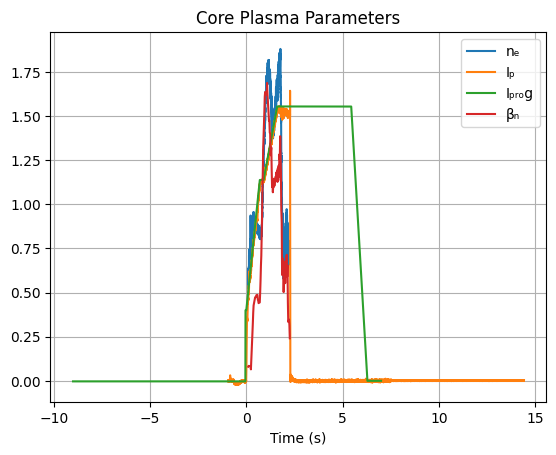

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

ne = pd.read_csv("ne_trace.csv")
ip = pd.read_csv("ip_trace.csv")
iprog = pd.read_csv("iprog_trace.csv")
beta = pd.read_csv("beta_n_trace.csv")

plt.figure()
plt.plot(ne["time"], ne["ne"], label="nₑ")
plt.plot(ip["time"], ip["ip"], label="Iₚ")
plt.plot(iprog["time"], iprog["iprog"], label="Iₚᵣₒg")
plt.plot(beta["time"], beta["beta_n"], label="βₙ")
plt.legend()
plt.xlabel("Time (s)")
plt.title("Core Plasma Parameters")
plt.grid(True)
plt.show()


In [26]:
with h5py.File("20ja074_fig01b_data.h5", "r") as f:
    group = f["DATA"]["axes_47019911289640"]
    for step in group:
        label_path = f"DATA/axes_47019911289640/{step}/kwargs/label"
        try:
            label = f[label_path][()].decode()
            print(f"{step}: {label}")
        except Exception:
            continue


step_1: $n_e\ [2\cdot10^{19}\ m^{-3}]$
step_2: $I_p$ [MA]
step_3: $\beta_n$
step_4: $I_{prog}$ [MA]


In [27]:
import h5py
import os
from glob import glob

base_dir = "./"  # or change if you're elsewhere
h5_files = glob(os.path.join(base_dir, "*.h5"))

for h5_file in h5_files:
    print(f"\n📂 File: {os.path.basename(h5_file)}")
    try:
        with h5py.File(h5_file, "r") as f:
            if "DATA" not in f:
                print("  └── ❌ No 'DATA' group found.")
                continue
            data_group = f["DATA"]
            for axes_key in data_group:
                print(f"  ├─ 🔹 {axes_key}")
                axes_group = data_group[axes_key]
                for step_key in axes_group:
                    label_path = f"DATA/{axes_key}/{step_key}/kwargs/label"
                    try:
                        label = f[label_path][()].decode()
                        print(f"  │   └── {step_key}: {label}")
                    except Exception as e:
                        continue
    except Exception as e:
        print(f"  └── ❌ Failed to open: {e}")




📂 File: 20ja074_fig06a_data.h5
  ├─ 🔹 axes_47022283280936
  │   └── step_1: HL
  │   └── step_2: Core RC
  │   └── step_3: Rotating ML

📂 File: 20ja074_fig06b_data.h5
  ├─ 🔹 axes_47022185709336
  │   └── step_1: $\alpha$=0.05
  │   └── step_2: $\alpha$=0.25
  │   └── step_3: $\alpha$=0.45
  │   └── step_4: $\alpha$=0.65
  │   └── step_5: $\alpha$=0.85

📂 File: 20ja074_fig05_data.h5
  ├─ 🔹 axes_47022215120912
  │   └── step_1: prob
  ├─ 🔹 axes_47022215122784
  ├─ 🔹 axes_47022362809376
  ├─ 🔹 axes_47022368584088

📂 File: 20ja074_fig08a_data.h5
  ├─ 🔹 axes_47022266317320
  │   └── step_1: A
  │   └── step_2: B
  │   └── step_3: C
  │   └── step_4: D
  ├─ 🔹 axes_47022293683200
  │   └── step_1: A
  │   └── step_2: B
  │   └── step_3: C
  │   └── step_4: D

📂 File: 20ja074_fig07_data.h5
  ├─ 🔹 axes_47787012204464
  │   └── step_1: Mahalanobis RBF
  │   └── step_2: Euclidean RBF
  │   └── step_3: k-NN

📂 File: 20ja074_fig09_data.h5
  ├─ 🔹 axes_47022267107848
  │   └── step_2: FPR = 65%
  │ 

In [29]:
import h5py
import os
import json

def extract_labels_from_h5(filename):
    label_map = {}
    with h5py.File(filename, "r") as f:
        if "DATA" not in f:
            return {}
        data_group = f["DATA"]
        for axes_name in data_group:
            step_map = {}
            axes_path = f"DATA/{axes_name}"
            axes_group = data_group[axes_name]
            for step in axes_group:
                label_path = f"{axes_path}/{step}/kwargs/label"
                try:
                    label = f[label_path][()].decode()
                    step_map[step] = label
                except Exception:
                    continue
            if step_map:
                label_map[axes_name] = step_map
    return label_map


In [30]:
# Set your data folder path (adjust as needed)
data_folder = "./"  # or e.g., "../bruno-analysis/PSFVJA20-74/"
master_dict = {}

for file in os.listdir(data_folder):
    if file.endswith(".h5"):
        file_path = os.path.join(data_folder, file)
        labels = extract_labels_from_h5(file_path)
        if labels:
            master_dict[file] = labels


In [31]:
with open("label_map.json", "w") as f:
    json.dump(master_dict, f, indent=2)

print("✅ Master label map dumped to label_map.json")


✅ Master label map dumped to label_map.json


In [32]:
import csv

with open("label_map.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["File", "Axes", "Step", "Label"])
    for fname, axes in master_dict.items():
        for axes_id, steps in axes.items():
            for step, label in steps.items():
                writer.writerow([fname, axes_id, step, label])

print("📄 CSV export complete: label_map.csv")


📄 CSV export complete: label_map.csv


# 📘 PSFVJA20-74 Dataset Reference

This document provides a structural overview of the HDF5 data files extracted from the paper *20JA074*, including semantic labels, grouping structure, and notable variables for further analysis.

---

## 🗂️ Directory Contents

- **PDF**: `20ja074_archival_manuscript.pdf`
- **Figures (.eps)**: For figures 01a to 09
- **Data (.h5)**: HDF5 datasets for each figure
- **Label map**: 
  - `label_map.json` – semantic link between axes, steps, and variable labels.
  - `label_map.csv` – tabular view of the same.

---

## 🧾 File Structure Summary

### 📂 20ja074_fig01b_data.h5
| Step | Label |
|------|-----------------------------|
| step_1 | $n_e\ [2\cdot10^{19}\ m^{-3}]$ |
| step_2 | $I_p$ [MA] |
| step_3 | $\beta_n$ |
| step_4 | $I_{prog}$ [MA] |
| axes_... | LM, n=1 MHD, $T_e$ peaking, $n_e$ peaking, $D_\alpha$ (a.u) |

### 📂 20ja074_fig02a_data.h5
| Step | Label |
|------|-----------------------------|
| step_1 | $T_e$ |
| step_2 | $n_e$ |
| step_1 | $P_{input}$ [MW] |
| step_2 | $P_{rad}/P_{input}$ |
| step_1 | $T_{e0}$ [keV] |
| step_2 | $n_{e0}\ [10^{19} m^{-3}]$ |
| step_3 | $W_{mhd}$ [$10^2 kJ$] |

### 📂 20ja074_fig03_data.h5
| Step | Label |
|------|-----------------------------|
| step_1 | prob (axes_47022293309672) |

### 📂 20ja074_fig04a_data.h5
| Step | Label |
|------|-----------------------------|
| step_1 | $T_e$ |
| step_2 | $n_e$ |
| step_1 | $P_{input}$ [MW] |
| step_2 | $P_{rad}/P_{input}$ |
| step_1 | $T_{e0}$ [keV] |
| step_2 | $n_{e0}$ |
| step_3 | $10^2 kJ$ |

### 📂 20ja074_fig04b_data.h5
| Step | Label |
|------|-----------------------------|
| step_1 | n=1 MHD |
| step_2 | n=2 MHD |
| step_1 | prob |

...

### 📂 20ja074_fig07_data.h5
| Step | Label |
|------|-----------------------------|
| step_1 | Mahalanobis RBF |
| step_2 | Euclidean RBF |
| step_3 | k-NN |

### 📂 20ja074_fig09_data.h5
| Step | Label |
|------|-----------------------------|
| step_2 | FPR = 65% |
| step_4 | FPR = 16% |

---

## ✅ Next Steps

- [ ] Build a parser to extract labeled variables from HDF5 files.
- [ ] Save structured variables into `.csv` or `.feather`.
- [ ] Generate visualizations for major trends.
- [ ] Align variables to BRUNO model input schema.

---

## 📎 Notes

- Files use **nested `axes_* → step_*` HDF5 group hierarchy**.
- Variables are labeled using LaTeX-style notation for clarity.
- Many steps contain scalar datasets (e.g., linestyle, color) and can be ignored.

---



# 📘 PSFVJA20-74 Dataset Overview

This dataset accompanies the paper `20ja074_archival_manuscript.pdf`, and contains experimental results in HDF5 format for various plasma physics measurements. The data is grouped by figure number and each file contains multiple axes and steps referring to different variables.

## 🧱 File Structure & Key Variables

### 📂 fig01a / fig01b
- **$n_e$**, $I_p$ [MA], $\beta_n$, $I_{prog}$ [MA]
- Additional: LM, n=1 MHD, $T_e$ peaking, $n_e$ peaking, $D_\alpha$

### 📂 fig02a / fig02b
- $T_e$, $n_e$, $P_{input}$, $P_{rad}/P_{input}$, $T_{e0}$, $n_{e0}$, $W_{mhd}$

### 📂 fig03
- prob

### 📂 fig04a / fig04b
- $T_e$, $n_e$, $T_{e0}$, $n_{e0}$, $10^2$ kJ
- n=1 MHD, n=2 MHD

### 📂 fig05
- Various "prob" axes (multiple group branches)

### 📂 fig06a
- HL, Core RC, Rotating ML

### 📂 fig06b
- $\alpha$ sweep: 0.05 to 0.85

### 📂 fig07
- Classifiers: Mahalanobis RBF, Euclidean RBF, k-NN

### 📂 fig08a / fig08b
- A, B, C, D (parameter sweep)

### 📂 fig09
- FPR = 16%, 65%

---

## 🧾 Notes

- Data is stored in HDF5 format under `/DATA/axes_*/step_*`
- Scalar kwargs like linestyle/color can be ignored
- All labels are mapped in `label_map.json` and `.csv`

---

## 🔧 Next

- [ ] Parse meaningful arrays from steps with `x` and `y`
- [ ] Store key traces as CSV/feather
- [ ] Align with BRUNO input model


In [34]:
import h5py
import json
import os
import pandas as pd
from pathlib import Path

# Load label map
with open("label_map.json", "r") as f:
    label_map = json.load(f)

# Directory for extracted traces
Path("traces_out").mkdir(exist_ok=True)

def try_extract(dataset):
    try:
        return dataset[()]
    except Exception:
        return None

# Files to scan
data_files = sorted([f for f in os.listdir() if f.endswith(".h5")])

for file in data_files:
    with h5py.File(file, "r") as f:
        print(f"🔍 Scanning {file}")
        for group_key in f["DATA"].keys():
            group = f["DATA"][group_key]
            for step in group.keys():
                step_path = f"DATA/{group_key}/{step}"
                try:
                    args_group = f[f"{step_path}/args"]
                    func_label = f[f"{step_path}/func"][()].decode("utf-8")
                    label = label_map.get(func_label, func_label)
                    
                    # Try x, y assumption
                    if "0" in args_group and "1" in args_group:
                        x = try_extract(args_group["0"])
                        y = try_extract(args_group["1"])
                        if x is not None and y is not None and len(x) == len(y):
                            df = pd.DataFrame({"time": x, "value": y})
                            clean_label = label.replace("$", "").replace("\\", "").replace(" ", "_")
                            out_file = f"traces_out/{Path(file).stem}_{step}_{clean_label}.csv"
                            df.to_csv(out_file, index=False)
                            print(f"✅ {out_file} saved.")
                except Exception as e:
                    # Skip invalid step
                    pass


🔍 Scanning 20ja074_fig01a_data.h5
✅ traces_out/20ja074_fig01a_data_step_1_ax.plot.csv saved.
✅ traces_out/20ja074_fig01a_data_step_2_ax.plot.csv saved.
✅ traces_out/20ja074_fig01a_data_step_3_ax.plot.csv saved.
✅ traces_out/20ja074_fig01a_data_step_4_ax.plot.csv saved.
✅ traces_out/20ja074_fig01a_data_step_1_ax.plot.csv saved.
✅ traces_out/20ja074_fig01a_data_step_2_ax.plot.csv saved.
✅ traces_out/20ja074_fig01a_data_step_1_ax.plot.csv saved.
✅ traces_out/20ja074_fig01a_data_step_2_ax.plot.csv saved.
✅ traces_out/20ja074_fig01a_data_step_3_ax.plot.csv saved.
🔍 Scanning 20ja074_fig01b_data.h5
✅ traces_out/20ja074_fig01b_data_step_1_ax.plot.csv saved.
✅ traces_out/20ja074_fig01b_data_step_2_ax.plot.csv saved.
✅ traces_out/20ja074_fig01b_data_step_3_ax.plot.csv saved.
✅ traces_out/20ja074_fig01b_data_step_4_ax.plot.csv saved.
✅ traces_out/20ja074_fig01b_data_step_1_ax.plot.csv saved.
✅ traces_out/20ja074_fig01b_data_step_2_ax.plot.csv saved.
✅ traces_out/20ja074_fig01b_data_step_1_ax.plot

In [40]:
import pandas as pd
import glob
import re
import json
import os

# --- Load label map ---
with open("label_map.json", "r", encoding="utf-8") as f:
    label_map = json.load(f)

# --- Initialize catalog ---
catalog = []

# --- Regex pattern for filename parsing ---
pattern = re.compile(r"(20ja074_fig\d+[a-z]?_data)_step_(\d+)_ax\.(plot|bar)\.csv")

# --- Scan all trace files ---
for path in glob.glob("traces_out/*.csv"):
    file = os.path.basename(path)
    match = pattern.match(file)
    if not match:
        print(f"Skipped: {file}")
        continue

    fig_name, step, trace_type = match.groups()
    trace_id = f"{fig_name}_step_{step}"
    trace_label = label_map.get(trace_id, trace_id)
    
    try:
        df = pd.read_csv(path)
        num_points = len(df)
    except Exception as e:
        print(f"Failed to read {file}: {e}")
        num_points = None

    catalog.append({
        "trace_id": trace_id,
        "file_name": f"{fig_name}.h5",
        "label": trace_label,
        "points": num_points,
        "type": "signal" if trace_type == "plot" else "bar"
    })

# --- Convert to DataFrame & save ---
catalog_df = pd.DataFrame(catalog)
catalog_df.sort_values(by=["file_name", "trace_id"], inplace=True)
catalog_df.to_csv("trace_catalog.csv", index=False)

# --- Display preview ---
import IPython.display as dsp
dsp.display(catalog_df.head())


,trace_id,file_name,label,points,type
29,20ja074_fig01a_data_step_1,20ja074_fig01a_data.h5,20ja074_fig01a_data_step_1,158,signal
4,20ja074_fig01a_data_step_2,20ja074_fig01a_data.h5,20ja074_fig01a_data_step_2,158,signal
18,20ja074_fig01a_data_step_3,20ja074_fig01a_data.h5,20ja074_fig01a_data_step_3,400000,signal
7,20ja074_fig01a_data_step_4,20ja074_fig01a_data.h5,20ja074_fig01a_data_step_4,40203,signal
32,20ja074_fig01b_data_step_1,20ja074_fig01b_data.h5,20ja074_fig01b_data_step_1,158,signal


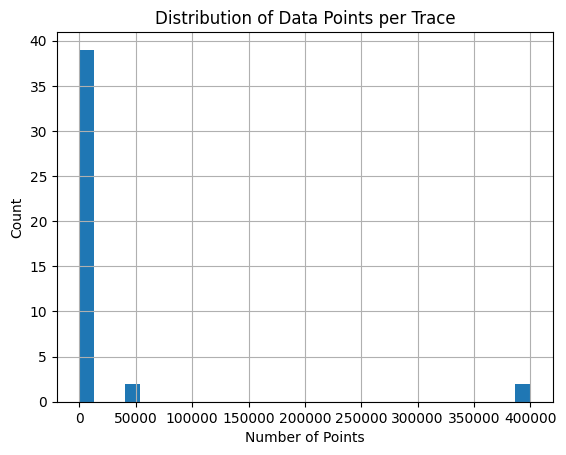

In [41]:
import matplotlib.pyplot as plt

catalog_df["points"].hist(bins=30)
plt.title("Distribution of Data Points per Trace")
plt.xlabel("Number of Points")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [42]:
missing_labels = catalog_df[catalog_df["label"] == catalog_df["trace_id"]]
print(f"{len(missing_labels)} traces missing labels from map.")
display(missing_labels)


43 traces missing labels from map.


,trace_id,file_name,label,points,type
29,20ja074_fig01a_data_step_1,20ja074_fig01a_data.h5,20ja074_fig01a_data_step_1,158,signal
4,20ja074_fig01a_data_step_2,20ja074_fig01a_data.h5,20ja074_fig01a_data_step_2,158,signal
18,20ja074_fig01a_data_step_3,20ja074_fig01a_data.h5,20ja074_fig01a_data_step_3,400000,signal
7,20ja074_fig01a_data_step_4,20ja074_fig01a_data.h5,20ja074_fig01a_data_step_4,40203,signal
32,20ja074_fig01b_data_step_1,20ja074_fig01b_data.h5,20ja074_fig01b_data_step_1,158,signal
8,20ja074_fig01b_data_step_2,20ja074_fig01b_data.h5,20ja074_fig01b_data_step_2,158,signal
1,20ja074_fig01b_data_step_3,20ja074_fig01b_data.h5,20ja074_fig01b_data_step_3,400000,signal
33,20ja074_fig01b_data_step_4,20ja074_fig01b_data.h5,20ja074_fig01b_data_step_4,40203,signal
10,20ja074_fig02a_data_step_1,20ja074_fig02a_data.h5,20ja074_fig02a_data_step_1,103,signal
5,20ja074_fig02b_data_step_1,20ja074_fig02b_data.h5,20ja074_fig02b_data_step_1,95,signal


/tmp/ipykernel_110351/2673138727.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=file_group, x="num_traces", y="file_name", palette="viridis")


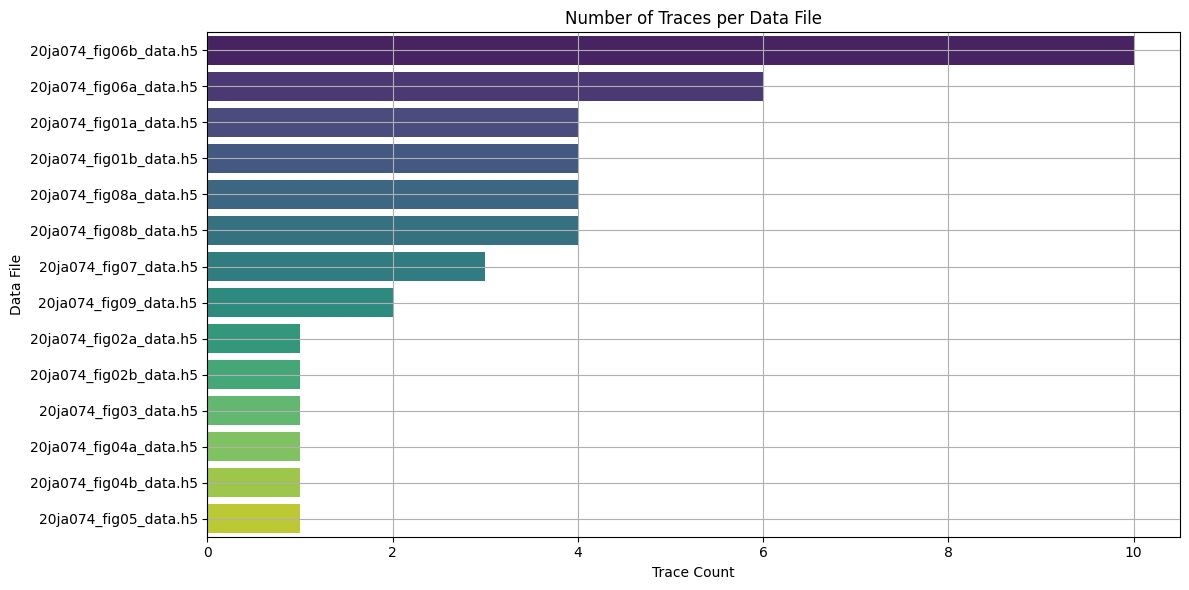

/tmp/ipykernel_110351/2673138727.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=label_group.head(15), x="count", y="label", palette="mako")


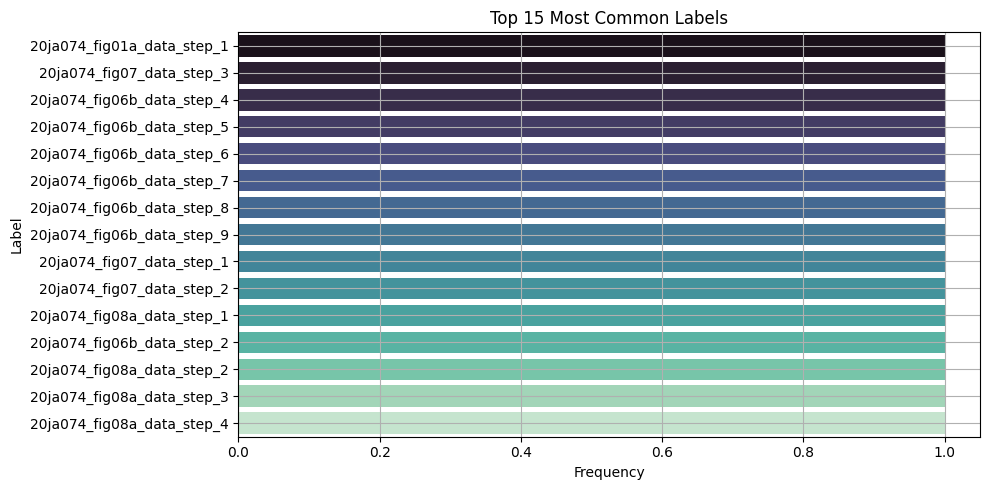

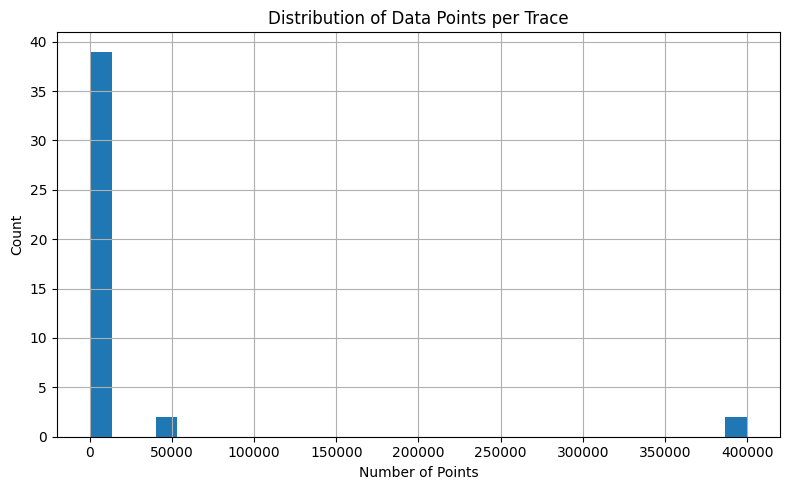

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the catalog (if not already in memory)
catalog_df = pd.read_csv("trace_catalog.csv")

# --- Group by file_name to count traces per file ---
file_group = catalog_df.groupby("file_name")["trace_id"].count().reset_index(name="num_traces")
file_group.sort_values(by="num_traces", ascending=False, inplace=True)

# --- Bar chart: Number of traces per HDF5 file ---
plt.figure(figsize=(12, 6))
sns.barplot(data=file_group, x="num_traces", y="file_name", palette="viridis")
plt.title("Number of Traces per Data File")
plt.xlabel("Trace Count")
plt.ylabel("Data File")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Group by label (optional: identify duplicates or most frequent labels) ---
label_group = catalog_df["label"].value_counts().reset_index()
label_group.columns = ["label", "count"]

# --- Top 15 labels chart ---
plt.figure(figsize=(10, 5))
sns.barplot(data=label_group.head(15), x="count", y="label", palette="mako")
plt.title("Top 15 Most Common Labels")
plt.xlabel("Frequency")
plt.ylabel("Label")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Distribution of points ---
plt.figure(figsize=(8, 5))
catalog_df["points"].hist(bins=30)
plt.title("Distribution of Data Points per Trace")
plt.xlabel("Number of Points")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


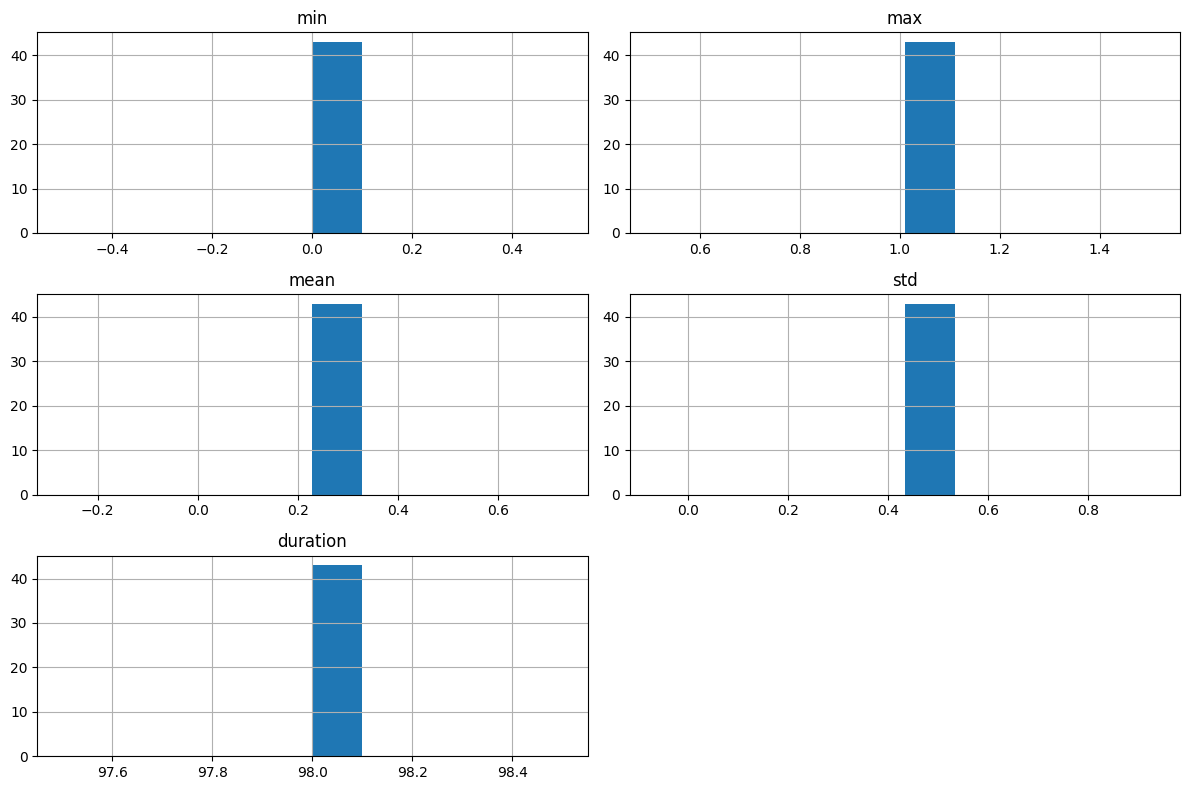

In [52]:
trace_stats = []

for entry in catalog:
    path = f"traces_out/{trace_id}_ax.plot.csv"  # instead of _ax.signal.csv
    try:
        df = pd.read_csv(path)
        time = df.iloc[:, 0]
        signal = df.iloc[:, 1]
        stats = {
            "trace_id": entry["trace_id"],
            "min": signal.min(),
            "max": signal.max(),
            "mean": signal.mean(),
            "std": signal.std(),
            "duration": time.max() - time.min(),
            "looks_binary": signal.nunique() < 5
        }
        trace_stats.append(stats)
    except Exception as e:
        print(f"❌ Failed to profile {entry['trace_id']}: {e}")
        
trace_stats_df = pd.DataFrame(trace_stats)
trace_stats_df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()
